SeokHwan SONG, #701520820

# Two-layer Linear Regression Neural Network

Welcome to your first programming assignment for EE526! You will build a binary classifier to recognize dogs. This assignment will step you through how to do this with a network that implements iterative logistic regression.

This project is based on a project from Coursera Deep Learning Basics by Andrew Ng.

**Instructions:**
EE 526 Assignment 1: Two-layer Linear Regression Neural Network

*Before you start*, please download a copy of this file and the two data files for testing and training into your google drive in the same folder as the notebook. Please put your name and ISU ID in following format at the top of the file.
: Firstname LASTNAME, #00000000 // e.g.) Julie DICKERSON, #12345678


# Assignment Objectives

- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Building sigmoid functions
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 

- Link the functions into a main model function that can run the training process in a single function call.

**Note:** this structure will be similar to the structures used in deep learning frameworks such as PyTorch and TensorFlow. So getting used to thinking this way will help you advance to more advanced projects later.

## 1 - Packages used in this code ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pickle](http://www.h5py.org) is a common package to interact with a dataset that is stored as a pickle file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

## 2 - Overview and Pre-processing of the Image data set ##

**Problem Statement**: The data set comes from the CIFAR-10 image collection. The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

You will use a dataset ("data_dog_nondog.pickle") containing:
    - a training set of m_train images labeled as dog (y=1) or non-dog (y=0)
    - a test set of m_test images labeled as dog or non-dog
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px). To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, so each pixel value is actually a vector of three numbers ranging from 0 to 255.

You will build a simple image-recognition algorithm that can correctly classify the images. 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Step 1: Read in the data files**

*Step 1A: Mount your google drive to link to the data file*
This process is illustrated in a short video on the assignment page. Basically, you will mount your Google drive (choose the iastate one). It will come back with a URL that will give you an authorization code.

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Step 1B: Load dataset You will have to be sure to put in the correct path for your files after the /content/gdrive/My Drive/.

Read the file. The data set is prepared as a python dictionary.

Do reshape and plot for check. Remember, each line in *x_train* correspond to a RGB picture, you need to reshape them correctly so that you can plot it as a picture we want. For more details, refer [cifar10](http://www.cs.toronto.edu/~kriz/cifar.html) to check how authors organized data.

In [5]:
with open('/content/gdrive/My Drive/Colab Notebooks/EE526HW1/data_dog_nondog.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)

print(data_dict.keys())

dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])


In [6]:
print(data_dict.keys())
x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_test = data_dict['x_test']
y_test = data_dict['y_test']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])
(2000, 3072)
(2000,)
(200, 3072)
(200,)


The images have already been preprocessed into a vector. After preprocessing, we will end up with train_set_x and test_set_x where each column is an input data vector.
Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Change the *index_dog* value and re-run the cell to see other images. For more details, refer cifar10 to check how authors organized data.

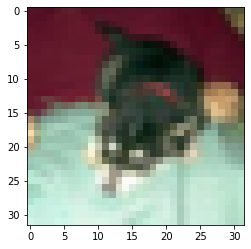

In [7]:
x_train_show = x_train.reshape((x_train.shape[0],3,32,32)).transpose(0,2,3,1)
x_test_show = x_test.reshape((x_test.shape[0],3,32,32)).transpose(0,2,3,1)
index_dog = 9
plt.imshow(x_test_show[index_dog,:,:,:])

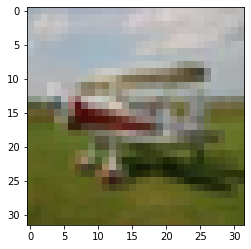

In [8]:
index_notdog = 1009
plt.imshow(x_train_show[index_notdog,:,:,:])

In [9]:
# Transpose the data so that each column is an image (dog/non-dog)
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_nx (size of the input vector)


In [10]:
### START CODE HERE ### 
m_train = x_train.shape[1]
m_test = x_test.shape[1]
num_nx = x_test.shape[0]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_nx))

Number of training examples: m_train = 2000
Number of testing examples: m_test = 200
Height/Width of each image: num_px = 3072


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 2000 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 200 </td> 
  </tr>
  
  <tr>
    <td>**num_nx**</td>
    <td> 3072 </td> 
  </tr>
  
</table>


###Standardize the data

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. This normalization helps to scale all the data into the same range. 

For picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode.

Let's standardize our dataset.

In [11]:
train_set_x = x_train/255.
test_set_x = x_test/255.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple network to distinguish dog images from non-dog images.

You will build a two layer linear regression neural network with backpropagation training as derived in class.


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = W^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 

    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Implement the `sigmoid()`. As you've seen in lecture, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp() to compute the exponential.

In [12]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### 
    s = 1/( 1 + np.exp( -z))

    ### END CODE HERE ###
    
    return s

In [13]:
# verify that your function works properly by putting in different size
# arrays and values. An example is given below.
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.random.randn() in the Numpy library's documentation at [numpy.org](https://numpy.org)

In [14]:
# GRADED FUNCTION: initialize_with_rand

def initialize_with_rand(dim):
    """
    This function creates a vector of small normally distributed random numbers of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar to 0 (corresponds to the bias)
    """
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    ### START CODE HERE ### 
    w = np.random.normal(0, 0.01, (dim, 1))
    b = 0
    ### END CODE HERE ###

# the assert statements are used to verify that the components
# are the expected size. This helps avoid errors in creating models.
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [15]:
dim = 2
w, b = initialize_with_rand(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[-0.00416758]
 [-0.00056267]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ -0.00416758]
 [ -0.00056267]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two vector formulas you will be using for back propagation: 

$$ \frac{\partial J}{\partial w} = -\frac{1}{m}X(Y-A)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = -\frac{1}{m} \sum_{i=1}^m (y^{(i)}-a^{(i)})\tag{8}$$

In [16]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### 
    m = X.shape[1]
    z = np.dot(w.T, X) + b
    A =  sigmoid(z)                 # compute activation
    cost = (-1/m)*np.sum(Y*(np.log(A)) + (1-Y)*(np.log(1-A)))          # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (-1/m)*np.dot(X, (Y-A).T)
    db = (-1/m)*np.sum(Y-A)
    ### END CODE HERE ###

    # verify the shapes/dimensions of vectors
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    # store gradients in a python dictionary object
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [17]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the loss function $L$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [18]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation - use previous routines
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads dictionary object
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule for w and b
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b =  b - learning_rate *db
        ### END CODE HERE ###
        
        # Record the costs every one hundred iterations
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [19]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


**Expected Output**: 

 **w** =[[ 0.19033591]
 [ 0.12259159]] 
 
 **b** = 1.92535983008 
 
 **dw** [[ 0.67752042]
 [ 1.41625495]] 
 
  **db**  0.219194504541 

**Exercise:** The previous function will output the learned w and b for the test set. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [20]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''0
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a dog being present in the picture
    ### START CODE HERE ###
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    # set the prediction to zeros
    Y_prediction = np.zeros_like(A)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE TO COMPUTE Y_prediction ### 
        if A[0, i] <= 0.5:
          Y_prediction[0, i] = 0
        else:
          Y_prediction[0, i] = 1
        
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
   # print (Y_pred1,Y_prediction)
    
    return Y_prediction

In [21]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))


predictions = [[1. 1. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [22]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with small random numbers 
    w, b = initialize_with_rand(X_train.shape[0])
    

    # Gradient descent 
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = print_cost)
  
    # Retrieve parameters w and b from dictionary "parameters"
    w = params["w"]
    b = params["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [23]:
d = model(train_set_x, y_train, test_set_x, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.702826
Cost after iteration 100: 0.601270
Cost after iteration 200: 0.587266
Cost after iteration 300: 0.578992
Cost after iteration 400: 0.573148
Cost after iteration 500: 0.568631
Cost after iteration 600: 0.564940
Cost after iteration 700: 0.561811
Cost after iteration 800: 0.559088
Cost after iteration 900: 0.556669
Cost after iteration 1000: 0.554488
Cost after iteration 1100: 0.552497
Cost after iteration 1200: 0.550659
Cost after iteration 1300: 0.548949
Cost after iteration 1400: 0.547346
Cost after iteration 1500: 0.545834
Cost after iteration 1600: 0.544401
Cost after iteration 1700: 0.543036
Cost after iteration 1800: 0.541731
Cost after iteration 1900: 0.540480
train accuracy: 71.85 %
test accuracy: 68.5 %


**Expected Output**: 

**Train Accuracy**= 71.85 % 
 
 **Test Accuracy** 
  68.5 % 

**Comment**: Training accuracy is close to 72%. This is a good sanity check: your model is working but it may not have enough capacity to fit the training data. Test accuracy is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

In other good news, you see that the model is not overfitting the training data as the accuracies are very similar. Later in this class you will learn how to reduce overfitting by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

dog 2
dog 4
dog 7
dog 10
dog 14
dog 16
dog 17
dog 18
dog 23
dog 24
dog 25
dog 26
dog 39
dog 40
dog 46
dog 51
dog 52
dog 58
dog 60
dog 64
dog 65
dog 67
dog 68
dog 69
dog 73
dog 74
dog 78
dog 84
dog 87
dog 89
dog 90
dog 92
dog 93
dog 97
not dog 102
not dog 109
not dog 110
not dog 112
not dog 116
not dog 117
not dog 124
not dog 125
not dog 130
not dog 134
not dog 135
not dog 136
not dog 137
not dog 138
not dog 140
not dog 141
not dog 142
not dog 143
not dog 147
not dog 148
not dog 152
not dog 153
not dog 157
not dog 160
not dog 161
not dog 162
not dog 163
not dog 171
not dog 173


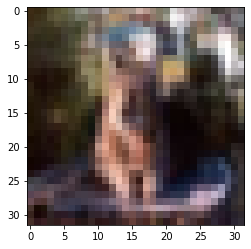

In [24]:
# Example of a picture that was wrongly classified.
# find test image that was wrongly classified and display
err_images = (d['Y_prediction_test'] - y_test)
index = 2
for i in range(err_images.shape[1]):
        if err_images[0,i] > 0.5:
            index_nodog = i
            print('not dog', index_nodog)
            
        if err_images[0,i] < 0:
            index_dog = i
            print('dog', index_dog)
            
# prints out lists where a dog was not called a dog and where something that was not a dog was called a dog

index_dog = 140
plt.imshow(x_test_show[index_dog,:,:,:])

Let's also plot the cost function and the gradients. This plot shows how the system is learning over time. When we are doing batch learning over the entire training set, the curve should be smooth.

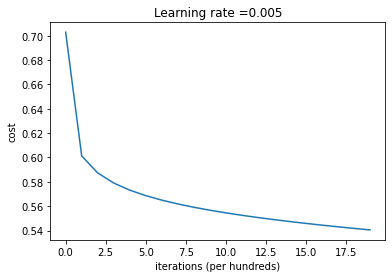

In [25]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

learning rate is: 0.01
train accuracy: 72.6 %
test accuracy: 68.5 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 68.55 %
test accuracy: 64.5 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 66.1 %
test accuracy: 65.0 %

-------------------------------------------------------



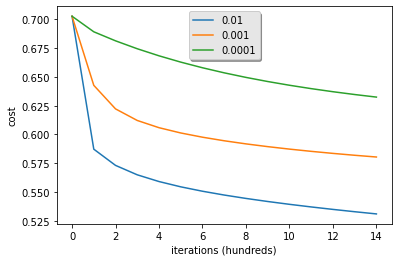

In [26]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, y_train, test_set_x, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

# Fill in the blanks below about what you have observed with different learning rates.
**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost goes to low and diverge to low cost from the result. But I cannot say that the large learning rate alwasy has low cost. 
- Does a smaller learning rate mean lower costs? why or why not?
A lower cost does not mean lower costs. Because the result above shows that the smaller learning rate has the bigger cost.
- What do you recommend doing to find the best learning rate?
I would recommend to pick the learning rate which would minimize the cost function. But it can also cause overfitting, so you need to be careful with it.

## 7 -Below this point, Try different parameters! such as learning rate and numer of iterations.  ##

Congratulations on finishing this assignment. Try different parameters! such as learning rate and numer of iterations. To do that:

    1. Change the learning rate and number of iterations.

    2. Try setting the initial weights to zero.

    3. Test other preprocessings (center the data, or divide each row by its standard deviation)


In [27]:
# Change number of Iterations.

num_iterations_list = [100, 1000, 2000, 4000, 6000, 8000, 10000]
for i in num_iterations_list:
  print ("num iterations is: " + str(i))
  d = model(train_set_x, y_train, test_set_x, y_test, num_iterations = i, learning_rate = 0.005, print_cost = False)
  print ('\n' + "-------------------------------------------------------" + '\n')

num iterations is: 100
train accuracy: 66.35 %
test accuracy: 65.5 %

-------------------------------------------------------

num iterations is: 1000
train accuracy: 70.1 %
test accuracy: 67.5 %

-------------------------------------------------------

num iterations is: 2000
train accuracy: 71.85 %
test accuracy: 68.5 %

-------------------------------------------------------

num iterations is: 4000
train accuracy: 73.35 %
test accuracy: 68.5 %

-------------------------------------------------------

num iterations is: 6000
train accuracy: 73.85 %
test accuracy: 69.0 %

-------------------------------------------------------

num iterations is: 8000
train accuracy: 74.95 %
test accuracy: 71.0 %

-------------------------------------------------------

num iterations is: 10000
train accuracy: 75.45 %
test accuracy: 71.0 %

-------------------------------------------------------



In [28]:
# num iterations = 8000 is good

learning rate is: 0.01
train accuracy: 77.15 %
test accuracy: 70.5 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 71.2 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.003
train accuracy: 73.8 %
test accuracy: 68.5 %

-------------------------------------------------------

learning rate is: 0.005
train accuracy: 74.95 %
test accuracy: 71.0 %

-------------------------------------------------------

learning rate is: 0.007
train accuracy: 75.7 %
test accuracy: 71.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 67.19999999999999 %
test accuracy: 66.5 %

-------------------------------------------------------



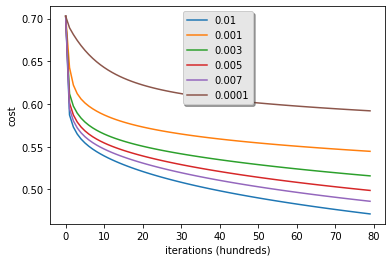

In [29]:
# Change the learning rate

learning_rates = [0.01, 0.001, 0.003, 0.005, 0.007, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, y_train, test_set_x, y_test, num_iterations = 8000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()











In [30]:
# learning rate = 0.01 is good

In [35]:
# Setting the initial weights to zero.
# GRADED FUNCTION: initialize_with_zero

def initialize_with_zero(dim):
    """
    This function creates a vector of small normally distributed random numbers of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar to 0 (corresponds to the bias)
    """
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    ### START CODE HERE ### 
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

# the assert statements are used to verify that the components
# are the expected size. This helps avoid errors in creating models.
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [36]:
# GRADED FUNCTION: model

def model_z(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros 
    w, b = initialize_with_zero(X_train.shape[0])
    

    # Gradient descent 
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = print_cost)
  
    # Retrieve parameters w and b from dictionary "parameters"
    w = params["w"]
    b = params["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [37]:
# Model with best num iteration and learning rate
d = model_z(train_set_x, y_train, test_set_x, y_test, num_iterations = 8000, learning_rate = 0.01, print_cost = False)

print ('\n' + "-------------------------------------------------------" + '\n')

# Model with the original num iteration and learning rate
d = model_z(train_set_x, y_train, test_set_x, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

train accuracy: 77.15 %
test accuracy: 71.0 %

-------------------------------------------------------

train accuracy: 71.75 %
test accuracy: 68.0 %


In [38]:
# Test other preprocessings (center the data, or divide each row by its standard deviation)

train_set_x_1 = x_train/np.std(x_train, 1)[:, None]
test_set_x_1 = x_test/np.std(x_test, 1)[:, None]

In [43]:
# Model with the original num iteration and learning rate (because of the runtime warning I changed learning rate from 0.005 to 0.001)
d = model(train_set_x_1, y_train, test_set_x_1, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = False)

print ('\n' + "-------------------------------------------------------" + '\n')

# Model with the best num iteration and learning rate (larg learning rate makes a problem so changed to 0.001)
d = model_z(train_set_x_1, y_train, test_set_x_1, y_test, num_iterations = 8000, learning_rate = 0.001, print_cost = False)

train accuracy: 71.15 %
test accuracy: 65.0 %

-------------------------------------------------------

train accuracy: 79.15 %
test accuracy: 70.5 %


<font color='blue'>
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c